# FILE PREPARATION!

url source: https://www.kaggle.com/datasets/muhriddinmuxiddinov/fruits-and-vegetables-dataset?resource=download

---

## **Library**

In [ ]:
import numpy as np
import pandas as pd
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf

# libraries for TF and transfer learning
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense,BatchNormalization, Flatten, MaxPool2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from keras.layers import Conv2D, Reshape
from tensorflow.keras.utils import Sequence
from keras.backend import epsilon
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# warnings
import warnings
warnings.filterwarnings('ignore')

print('importing libraries completed.')

importing libraries completed.


## **Data Preparation**

In [ ]:
!unzip '/content/drive/MyDrive/Dataset/fruits & vegetables.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (444).jpg  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (445).jpg  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (446).JPG  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (447).jpg  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (448).jpg  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (449).jpg  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (45).jpg  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (450).jpg  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (451).jpg  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (452).jpg  
  inflating: Fruits_

In [ ]:
mypath = '/content/Fruits_Vegetables_Dataset(12000)'

In [ ]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name).replace("\\","/")) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [ ]:
# input the variables that have been collected in the loop above
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
FreshApple          612
FreshBanana         624
FreshBellpepper     611
FreshCarrot         620
FreshCucumber       608
FreshMango          605
FreshOrange         609
FreshPotato         615
FreshStrawberry     603
FreshTomato         604
RottenApple         588
RottenBanana        576
RottenBellpepper    591
RottenCarrot        580
RottenCucumber      593
RottenMango         593
RottenOrange        591
RottenPotato        585
RottenStrawberry    596
RottenTomato        596
dtype: int64

In [ ]:
# check the sample data
df.head()

,path,file_name,tag
0,/content/Fruits_Vegetables_Dataset(12000)/Frui...,freshApple (655).png,FreshApple
1,/content/Fruits_Vegetables_Dataset(12000)/Frui...,freshApple (675).png,FreshApple
2,/content/Fruits_Vegetables_Dataset(12000)/Frui...,freshApple (615).png,FreshApple
3,/content/Fruits_Vegetables_Dataset(12000)/Frui...,freshApple (794).png,FreshApple
4,/content/Fruits_Vegetables_Dataset(12000)/Frui...,freshApple (279).jpg,FreshApple


In [ ]:
# variables used in this data separation
x = df['path']
y = df['tag']

In [ ]:
# split the initial dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.10, random_state=300)

In [ ]:
# divide the test data into 2 (validation and test data)
x_test, x_val, y_test, y_val = train_test_split(
    x_test, y_test, test_size=0.5, random_state=100)

In [ ]:
# lump it into each dataframe
df_train = pd.DataFrame({'path':x_train
              ,'tag':y_train
             ,'set':'train'})

df_test = pd.DataFrame({'path':x_test
              ,'tag':y_test
             ,'set':'test'})

df_val = pd.DataFrame({'path':x_val
              ,'tag':y_val
             ,'set':'validation'})

In [ ]:
print('train size', len(df_train))
print('val size', len(df_test))
print('test size', len(df_val))

train size 10800
val size 600
test size 600


In [ ]:
# check the proportions in each set, is it appropriate or not
df_all = df_train.append([df_test,df_val]).reset_index(drop=1)

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

# check the sample data
df_all.sample(3)


set         tag             
test        FreshApple           23
            FreshBanana          28
            FreshBellpepper      31
            FreshCarrot          34
            FreshCucumber        36
            FreshMango           43
            FreshOrange          28
            FreshPotato          31
            FreshStrawberry      29
            FreshTomato          30
            RottenApple          23
            RottenBanana         28
            RottenBellpepper     41
            RottenCarrot         37
            RottenCucumber       34
            RottenMango          26
            RottenOrange         29
            RottenPotato         28
            RottenStrawberry     19
            RottenTomato         22
train       FreshApple          558
            FreshBanana         566
            FreshBellpepper     541
            FreshCarrot         556
            FreshCucumber       537
            FreshMango          537
            FreshOrange         54

,path,tag,set
11441,/content/Fruits_Vegetables_Dataset(12000)/Frui...,FreshMango,validation
8019,/content/Fruits_Vegetables_Dataset(12000)/Vege...,RottenBellpepper,train
1762,/content/Fruits_Vegetables_Dataset(12000)/Vege...,RottenPotato,train


## **Tidy Up to Each Set Folder**

In [ ]:
# delete previous dataset folder if needed
# !rm -rf dataset/

In [ ]:
import shutil
from tqdm.notebook import tqdm as tq

In [ ]:
datasource_path = '/content/Fruits_Vegetables_Dataset(12000)'
dataset_path = '/content/fruits & vegetables dataset'

In [ ]:
for index, row in tq(df_all.iterrows(), ):
    
    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    #make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

# **Data Preprocessing**

---



In [ ]:
# make a train, validation, & test directory
train_dir = "/content/fruits & vegetables dataset/train"
train_class = os.listdir(train_dir)
print(train_class)
print("\n")

val_dir = "/content/fruits & vegetables dataset/validation"
val_class = os.listdir(val_dir)
print(val_class)
print("\n")

test_dir = "/content/fruits & vegetables dataset/test"
test_class = os.listdir(test_dir)
print(test_class)

['RottenCucumber', 'FreshBellpepper', 'FreshApple', 'RottenBellpepper', 'FreshMango', 'RottenPotato', 'RottenTomato', 'FreshCarrot', 'FreshOrange', 'RottenApple', 'FreshPotato', 'RottenOrange', 'FreshTomato', 'FreshCucumber', 'FreshBanana', 'FreshStrawberry', 'RottenStrawberry', 'RottenBanana', 'RottenMango', 'RottenCarrot']


['RottenCucumber', 'FreshBellpepper', 'FreshApple', 'RottenBellpepper', 'FreshMango', 'RottenPotato', 'RottenTomato', 'FreshCarrot', 'FreshOrange', 'RottenApple', 'FreshPotato', 'RottenOrange', 'FreshTomato', 'FreshCucumber', 'FreshBanana', 'FreshStrawberry', 'RottenStrawberry', 'RottenBanana', 'RottenMango', 'RottenCarrot']


['RottenCucumber', 'FreshBellpepper', 'FreshApple', 'RottenBellpepper', 'FreshMango', 'RottenPotato', 'RottenTomato', 'FreshCarrot', 'FreshOrange', 'RottenApple', 'FreshPotato', 'RottenOrange', 'FreshTomato', 'FreshCucumber', 'FreshBanana', 'FreshStrawberry', 'RottenStrawberry', 'RottenBanana', 'RottenMango', 'RottenCarrot']


In [ ]:
x=[] # array value of the images
y=[] # the labels of the images

for folder in os.listdir(train_dir):
    image_list=os.listdir(train_dir+"/"+folder)
    for img_name in image_list:
        # Loading images
        img = image.load_img(train_dir+"/" + folder+"/" + img_name, target_size=(224,224))
        img = image.img_to_array(img)
        
        # Transfer Learning: Preprocess of MobileNetV2 model to our images before passing it to MobileNetV2
        img = preprocess_input(img)
        
        x.append(img) # appending image array
        y.append(train_class.index(folder)) # appending class index to the array
        
print("Preparing Training Dataset Completed.")

Preparing Training Dataset Completed.


In [ ]:
val_images=[]
val_images_original=[]
val_image_label=[]

for folder in os.listdir(val_dir):
    image_list=os.listdir(val_dir + "/" + folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(val_dir + "/" + folder + "/" + img_name, target_size=(224,224))
        
        # Converting to arrarys
        img=image.img_to_array(img)
        
        # Saving original images, will be used just for display at the end
        val_images_original.append(img.copy())
        img=preprocess_input(img) 
        
        # Appending arrays
        val_images.append(img)
        val_image_label.append(val_class.index(folder))
        
print("Preparing Validation Dataset Completed.")

Preparing Validation Dataset Completed.


In [ ]:
test_images=[]
test_images_original=[]
test_image_label=[]

for folder in os.listdir(test_dir):
    image_list=os.listdir(test_dir + "/" + folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(test_dir + "/" + folder + "/" + img_name, target_size=(224,224))
        
        # Converting to arrarys
        img=image.img_to_array(img)
        
        # Saving original images, will be used just for display at the end
        test_images_original.append(img.copy())
        img=preprocess_input(img) 
        
        # Appending arrays
        test_images.append(img)
        test_image_label.append(test_class.index(folder))
        
print("Preparing Test Dataset Completed.")

Preparing Test Dataset Completed.


## **Sample Images**

In [ ]:
# define the variables
random_img1 = random.sample(os.listdir('/content/fruits & vegetables dataset/train/FreshApple'), 4)
random_img2 = random.sample(os.listdir('/content/fruits & vegetables dataset/train/RottenMango'), 4)

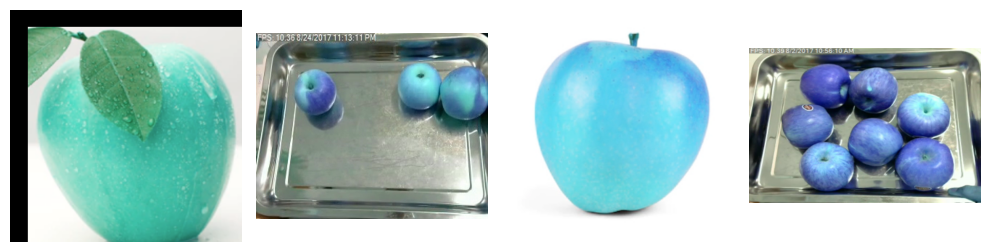

In [ ]:
# plot the images
fig = plt.figure(figsize = (10,10))
for i, im in enumerate(random_img1):
  plt.subplot(2, 4, i+1)
  im = cv2.imread(os.path.join('/content/fruits & vegetables dataset/train/FreshApple', im))
  plt.imshow(im)
  plt.axis('off')

plt.tight_layout()
plt.show()

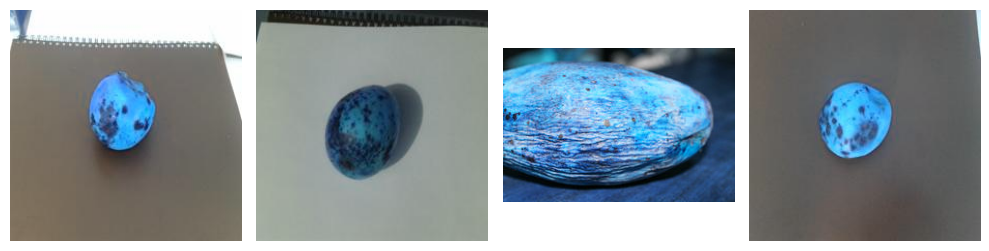

In [ ]:
# plot the images
fig = plt.figure(figsize = (10,10))
for i, im in enumerate(random_img2):
  plt.subplot(2, 4, i+1)
  im = cv2.imread(os.path.join('/content/fruits & vegetables dataset/train/RottenMango', im))
  plt.imshow(im)
  plt.axis('off')

plt.tight_layout()
plt.show()

# **Model Train**

---

## **Image Augmentation**

In [ ]:
def train_val_generators(train_dir, val_dir):
# Instantiate the ImageDataGenerator class 
  train_datagen = ImageDataGenerator(rescale=1./255.,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

# Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                      batch_size=45,
                                                      class_mode='categorical',
                                                      target_size=(224, 224))

# Instantiate the ImageDataGenerator class 
  validation_datagen = ImageDataGenerator(rescale = 1./255.)  

# Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=val_dir,
                                                                batch_size=45,
                                                                class_mode='categorical',
                                                                target_size=(224, 224))

  return train_generator, validation_generator

In [ ]:
# test the generators
train_generator, validation_generator = train_val_generators(train_dir, val_dir)

Found 10786 images belonging to 20 classes.
Found 600 images belonging to 20 classes.


##**Model Building**

In [ ]:
# building models
mnet = MobileNetV2(include_top = False, weights = 'imagenet', input_shape=(224,224,3))

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
tf.keras.backend.clear_session()

model = Sequential([mnet,
                    GlobalAveragePooling2D(),
                    Dense(512, activation = "relu"),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation = "relu"),
                    Dropout(0.1),
                    Dense(64, activation = "relu"),
                    Dropout(0.3),
                    Dense(20, activation = "softmax")])

model.layers[0].trainable = False

model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics="accuracy")

model.summary()
Model: "sequential"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                        

 **Callbacks**

In [ ]:
def scheduler(epoch):
  if epoch <= 2:
    return 0.001
  elif epoch > 2 and epoch <= 15:
    return 0.0001
  else:
    return 0.00001

lr_callbacks = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
#DESIRED_ACCURACY = 0.90

#class MyCallback(tf.keras.callbacks.Callback):
#    def on_epoch_end(self, epoch, logs={}):
#        if (logs.get('accuracy') is not None and logs.get('accuracy') >= DESIRED_ACCURACY):
#            print("\nReached accuracy threshold! Terminating training.")
#            self.model.stop_training = True
            
#callbacks = MyCallback()

## **Training**

In [ ]:
epochs = 3
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = epochs,
                    verbose = 1,
                    callbacks = lr_callbacks
                    )

Epoch 1/3
240/240 [==============================] - 660s 3s/step - loss: 1.0139 - accuracy: 0.6936 - val_loss: 0.4012 - val_accuracy: 0.8783 - lr: 0.0010
Epoch 2/3
240/240 [==============================] - 636s 3s/step - loss: 0.5034 - accuracy: 0.8486 - val_loss: 0.3151 - val_accuracy: 0.9017 - lr: 0.0010
Epoch 3/3
240/240 [==============================] - 633s 3s/step - loss: 0.3940 - accuracy: 0.8766 - val_loss: 0.3262 - val_accuracy: 0.9000 - lr: 0.0010


## **Visualizing the accuracy and loss**

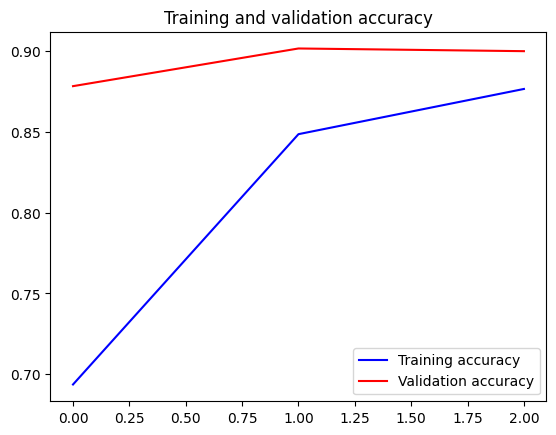

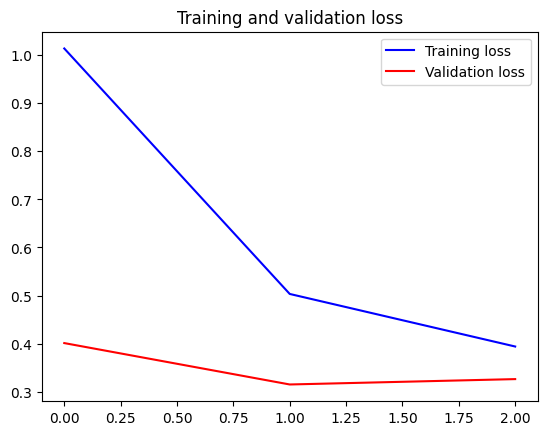

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()